In [44]:
import numpy as np

In [45]:
import pandas as pd

In [46]:
np.random.seed(42)

In [47]:
employee_ids = [f"EMP_{i:03d}"for i in range (1,31)]
dates = pd. date_range("2025-07-01",periods=30, freq="D")

In [48]:
data = {

            "Date": np.tile(dates, len(employee_ids)),
            "Employee_ID" : np.repeat(employee_ids, len(dates)),
            "Working_Hours": np.random.uniform(4, 10, size=len(dates)
* len(employee_ids)).round(2)

}

In [49]:
df = pd.DataFrame(data)

In [50]:
df.to_csv("employee_working_hours.csv", index=False)

In [51]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [52]:
row=df.iloc[52]
print(row)

Date             2025-07-23 00:00:00
Employee_ID                  EMP_002
Working_Hours                   9.64
Name: 52, dtype: object


In [53]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [54]:
total_hours = df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [55]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [56]:
threshold_low = 5
threshold_high = 9
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] > threshold_high

In [57]:
print(df_csv[df_csv["Low_Hour_Flag"] |
df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

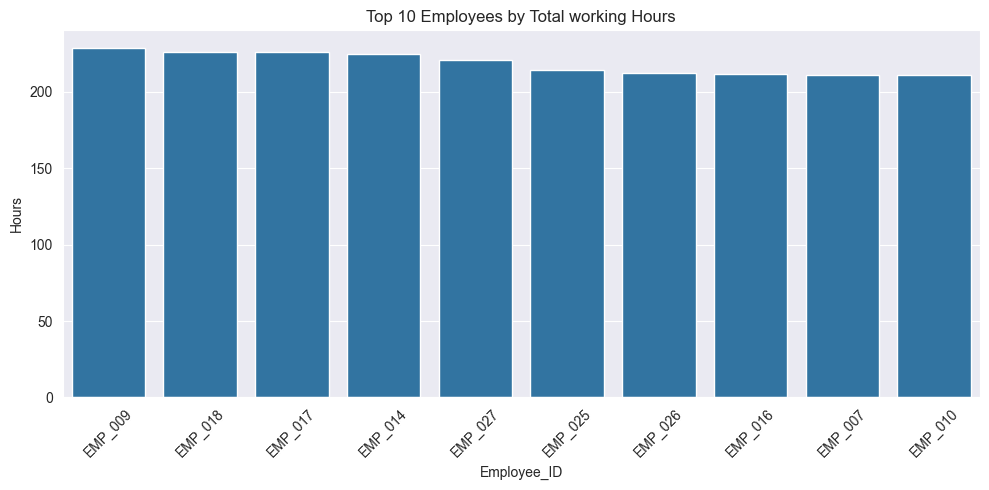

In [59]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

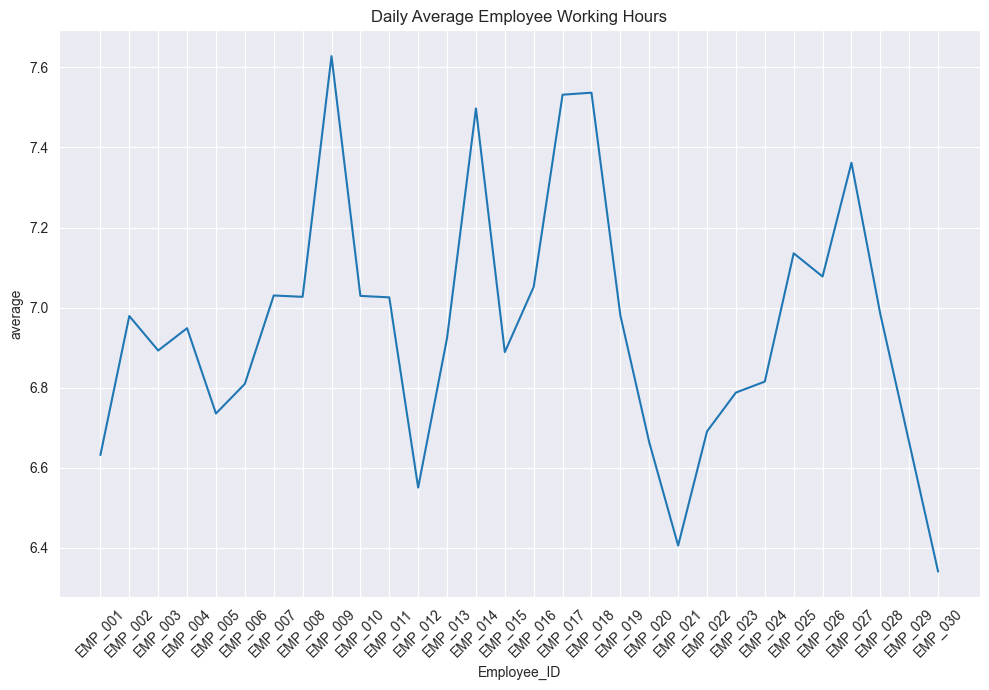

In [65]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,7))
sns.lineplot(x=avg_daily.index, y=avg_daily.values)
plt.xticks(rotation=45)
plt.title("Daily Average Employee Working Hours")
plt.ylabel("average")
plt.tight_layout()
plt.show()